# Read and Visualize CHIRPS Monthly Precipitation


"Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS) is a 35+ year quasi-global rainfall data set. Spanning 50°S-50°N (and all longitudes) and ranging from 1981 to near-present, CHIRPS incorporates our in-house climatology, CHPclim, 0.05° resolution satellite imagery, and in-situ station data to create gridded rainfall time series for trend analysis and seasonal drought monitoring" 
 

Read more about CHIRPS here: https://www.nature.com/articles/sdata201566


The data is available here:


https://data.chc.ucsb.edu/products/CHIRPS-2.0/africa_monthly/tifs/

-----------------------
DTR

# Import packages

In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import cartopy

In [4]:
from osgeo import gdal

In [5]:
import rasterio

In [6]:
import os

# Directory Management

In [7]:
#os.getcwd()

In [8]:
dir_data = '/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/CHIRPS/'
dir_data

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/CHIRPS/'

In [9]:
os.listdir(dir_data)

['chirps-v2.0.2018.12.tif.gz',
 'chirps-v2.0.2018.05.tif',
 'chirps-v2.0.2018.05.tif.gz',
 'chirps-v2.0.2018.12.tif']

In [10]:
lst_chirps = [fl for fl in os.listdir(dir_data) if fl.endswith('.tif') ]
lst_chirps

['chirps-v2.0.2018.05.tif', 'chirps-v2.0.2018.12.tif']

In [11]:
os.path.join(dir_data, lst_chirps[0] )

'/media/donald/disk10/DATA_GEOSPATIAL_SAT_READ/CHIRPS/chirps-v2.0.2018.05.tif'

# Read the data

In [12]:
ds_Rain = gdal.Open(  os.path.join(dir_data, lst_chirps[1] ) )

/home/donald/anaconda3/envs/geospatial/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [13]:
# was the projection read successfully, if it exists
ds_Rain.GetProjection()

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [14]:
# was the geotransform read successfully, if it exists
ds_Rain.GetGeoTransform()

(-20.0, 0.05000000074505806, 0.0, 40.0, 0.0, -0.05000000074505806)

In [15]:
ds_Rain.RasterCount # how many bands

1

In [16]:
ds_Rain.RasterXSize

1500

In [17]:
ds_Rain.RasterYSize

1600

## Read the data

In [18]:
arr_rain = ds_Rain.ReadAsArray()

In [19]:
arr_rain.shape

(1600, 1500)

In [20]:
arr_rain

array([[-9999.      , -9999.      , -9999.      , ...,    40.411037,
           39.495255,    39.966324],
       [-9999.      , -9999.      , -9999.      , ...,    39.78893 ,
           38.66624 ,    37.825302],
       [-9999.      , -9999.      , -9999.      , ...,    34.271347,
           34.19788 ,    32.639416],
       ...,
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ],
       [-9999.      , -9999.      , -9999.      , ..., -9999.      ,
        -9999.      , -9999.      ]], dtype=float32)

In [21]:
arr_rain.min()

-9999.0

In [22]:
# set -9999.0 to np.nan
arr_rain[arr_rain== -9999.0] = np.nan

In [23]:
arr_rain.shape

(1600, 1500)

## Plot using matplotlib

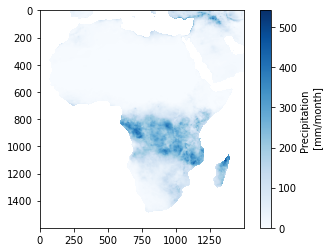

In [24]:
plt.figure()
## add data
plt.imshow(arr_rain, cmap= plt.get_cmap('Blues') )
## add colobar
plt.colorbar(label='Precipitation \n [mm/month]')
plt.show()

## Plot using cartopy

In [25]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature


In [26]:
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [27]:
ds_Rain.GetGeoTransform() #GDAL defines the top right corner coordinates

(-20.0, 0.05000000074505806, 0.0, 40.0, 0.0, -0.05000000074505806)

In [28]:
arr_rain.shape

(1600, 1500)

In [29]:
40 - (0.05*1600)

-40.0

In [30]:
-20 + (0.05*1500)

55.0

In [31]:
img_extent = [-20, 55, -40, 40]

... now plot

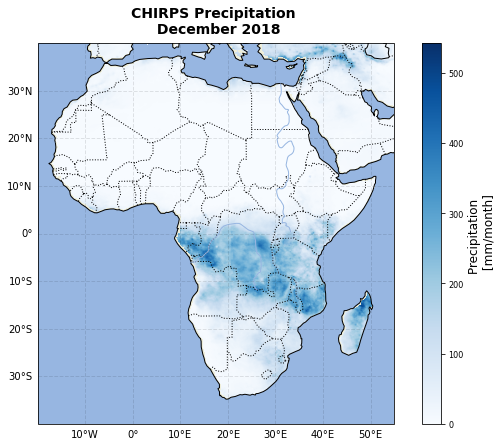

In [34]:
fig = plt.figure(figsize=(10,7) )
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
#ax.set_extent([-20, 40, -40, 45], crs=ccrs.PlateCarree())

# extent=[longitude_top_left,longitude_top_right,latitude_bottom_left,latitude_top_left]
img_extent = [-20, 55, -40, 40]
ax.set_extent(img_extent,  crs=ccrs.PlateCarree())

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.25)
ax.add_feature(cfeature.RIVERS)

#add data
map_ch = ax.imshow(arr_rain, cmap= plt.get_cmap('Blues'), origin='upper', 
                   extent=img_extent, transform=ccrs.PlateCarree())

#clbar=plt.colorbar()
clbar =fig.colorbar(map_ch, orientation="vertical" )#label='Precipitation \n [mm/month]',
clbar.ax.tick_params(labelsize=8) 
clbar.set_label(label='Precipitation \n [mm/month]', fontsize=12)
##########
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color="k", alpha=0.1, linestyle="--")
gl.top_labels = False
gl.right_labels = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.ylines = True
#gl.xlines = True

## write title
ax.set_title('CHIRPS Precipitation \n December 2018', fontsize=14, y=1.01, weight='bold')

plt.show()